# House Prices: Advanced Regression Techniques

![houses](houses.gif)

Przed rozpoczęciem projektu obejrzałem kilka filmów i przeczytałem artykuły na temat uczenia maszynowego, regresji liniowej i eksploracji danych:
1. https://en.wikipedia.org/wiki/Linear_regression
2. https://en.wikipedia.org/wiki/Simple_linear_regression
3. https://en.wikipedia.org/wiki/Regression_analysis
4. https://www.w3schools.com/python/python_ml_linear_regression.asp
5. https://www.epa.gov/caddis-vol4/exploratory-data-analysis#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,step%20in%20any%20data%20analysis.
6. https://en.wikipedia.org/wiki/Exploratory_data_analysis
7. https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/
***

### Importing Necessary Libraries
W tej sekcji zaimportujemy kilka kluczowych bibliotek Pythona:
- `NumPy` do wydajnych obliczeń numerycznych.
- `Matplotlib` i `Seaborn` do wizualizacji danych, które pomogą w zrozumieniu rozkładów i relacji w naszych danych.
- `Pandas` do manipulacji danymi, ułatwiając czyszczenie, analizę i wstępne przetwarzanie naszych danych.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Loading and Initial Exploration

### Loading the Dataset
Tutaj ładujemy nasze zbiory danych:
- `train.csv` zawiera dane treningowe.
- `test.csv` służy do testowania wydajności naszego modelu.
Zbiory danych są ładowane do Pandas DataFrames w celu ułatwienia manipulacji.


In [87]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Initial Exploration

### Preliminary Data Exploration
Używamy `train.head()`, aby przejrzeć pierwsze pięć wierszy treningowego zbioru danych. Ta wstępna eksploracja pomaga w zrozumieniu struktury danych, typów cech (numerycznych lub kategorycznych) oraz wszelkich bezpośrednich nieprawidłowości danych (takich jak brakujące wartości).

In [88]:
print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

---
Poniższe polecenie oblicza liczbę brakujących wartości (wartości NaN) w każdej kolumnie szkoleniowego zbioru danych.
Wynik pokazuje, że niektóre kolumny mają znaczną liczbę brakujących wartości, takich jak "LotFrontage" z 259 brakującymi wartościami.
Ważne jest, aby odpowiednio obsługiwać te brakujące wartości na etapie wstępnego przetwarzania danych, ponieważ mogą one wpływać na wydajność modelu.

In [89]:
print(train.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


---
Użycie poniżej train.describe() zapewnia podsumowanie statystyk odnoszących się do kolumn DataFrame. Obejmuje to liczbę, średnią, odchylenie standardowe (std), min, kwartyle i maksimum.
Dane wyjściowe pomagają zrozumieć rozkład cech liczbowych. Na przykład:
Id: Zakres od 1 do 1460, wskazujący unikalne identyfikatory dla każdego domu.
MSSubClass, LotFrontage, LotArea itp. pokazują różne zakresy, średnie i odchylenia standardowe, które dają wgląd w skalę i wariancję tych cech.
SalePrice ma średnią około 180 921 USD, odchylenie standardowe około 79 442 USD i zakres od 34 900 USD do 755 000 USD.

In [90]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

## Exploratory Data Analysis (EDA)

### Variable Distribution:

#### Histograms for Variable Distribution
Ta sekcja wizualizuje rozkład każdej zmiennej numerycznej w naszym zbiorze danych za pomocą histogramów. Wykresy te są pomocne w zrozumieniu zakresu, skośności i ogólnych trendów rozkładu cech, które mogą kierować przyszłymi decyzjami dotyczącymi wstępnego przetwarzania danych.


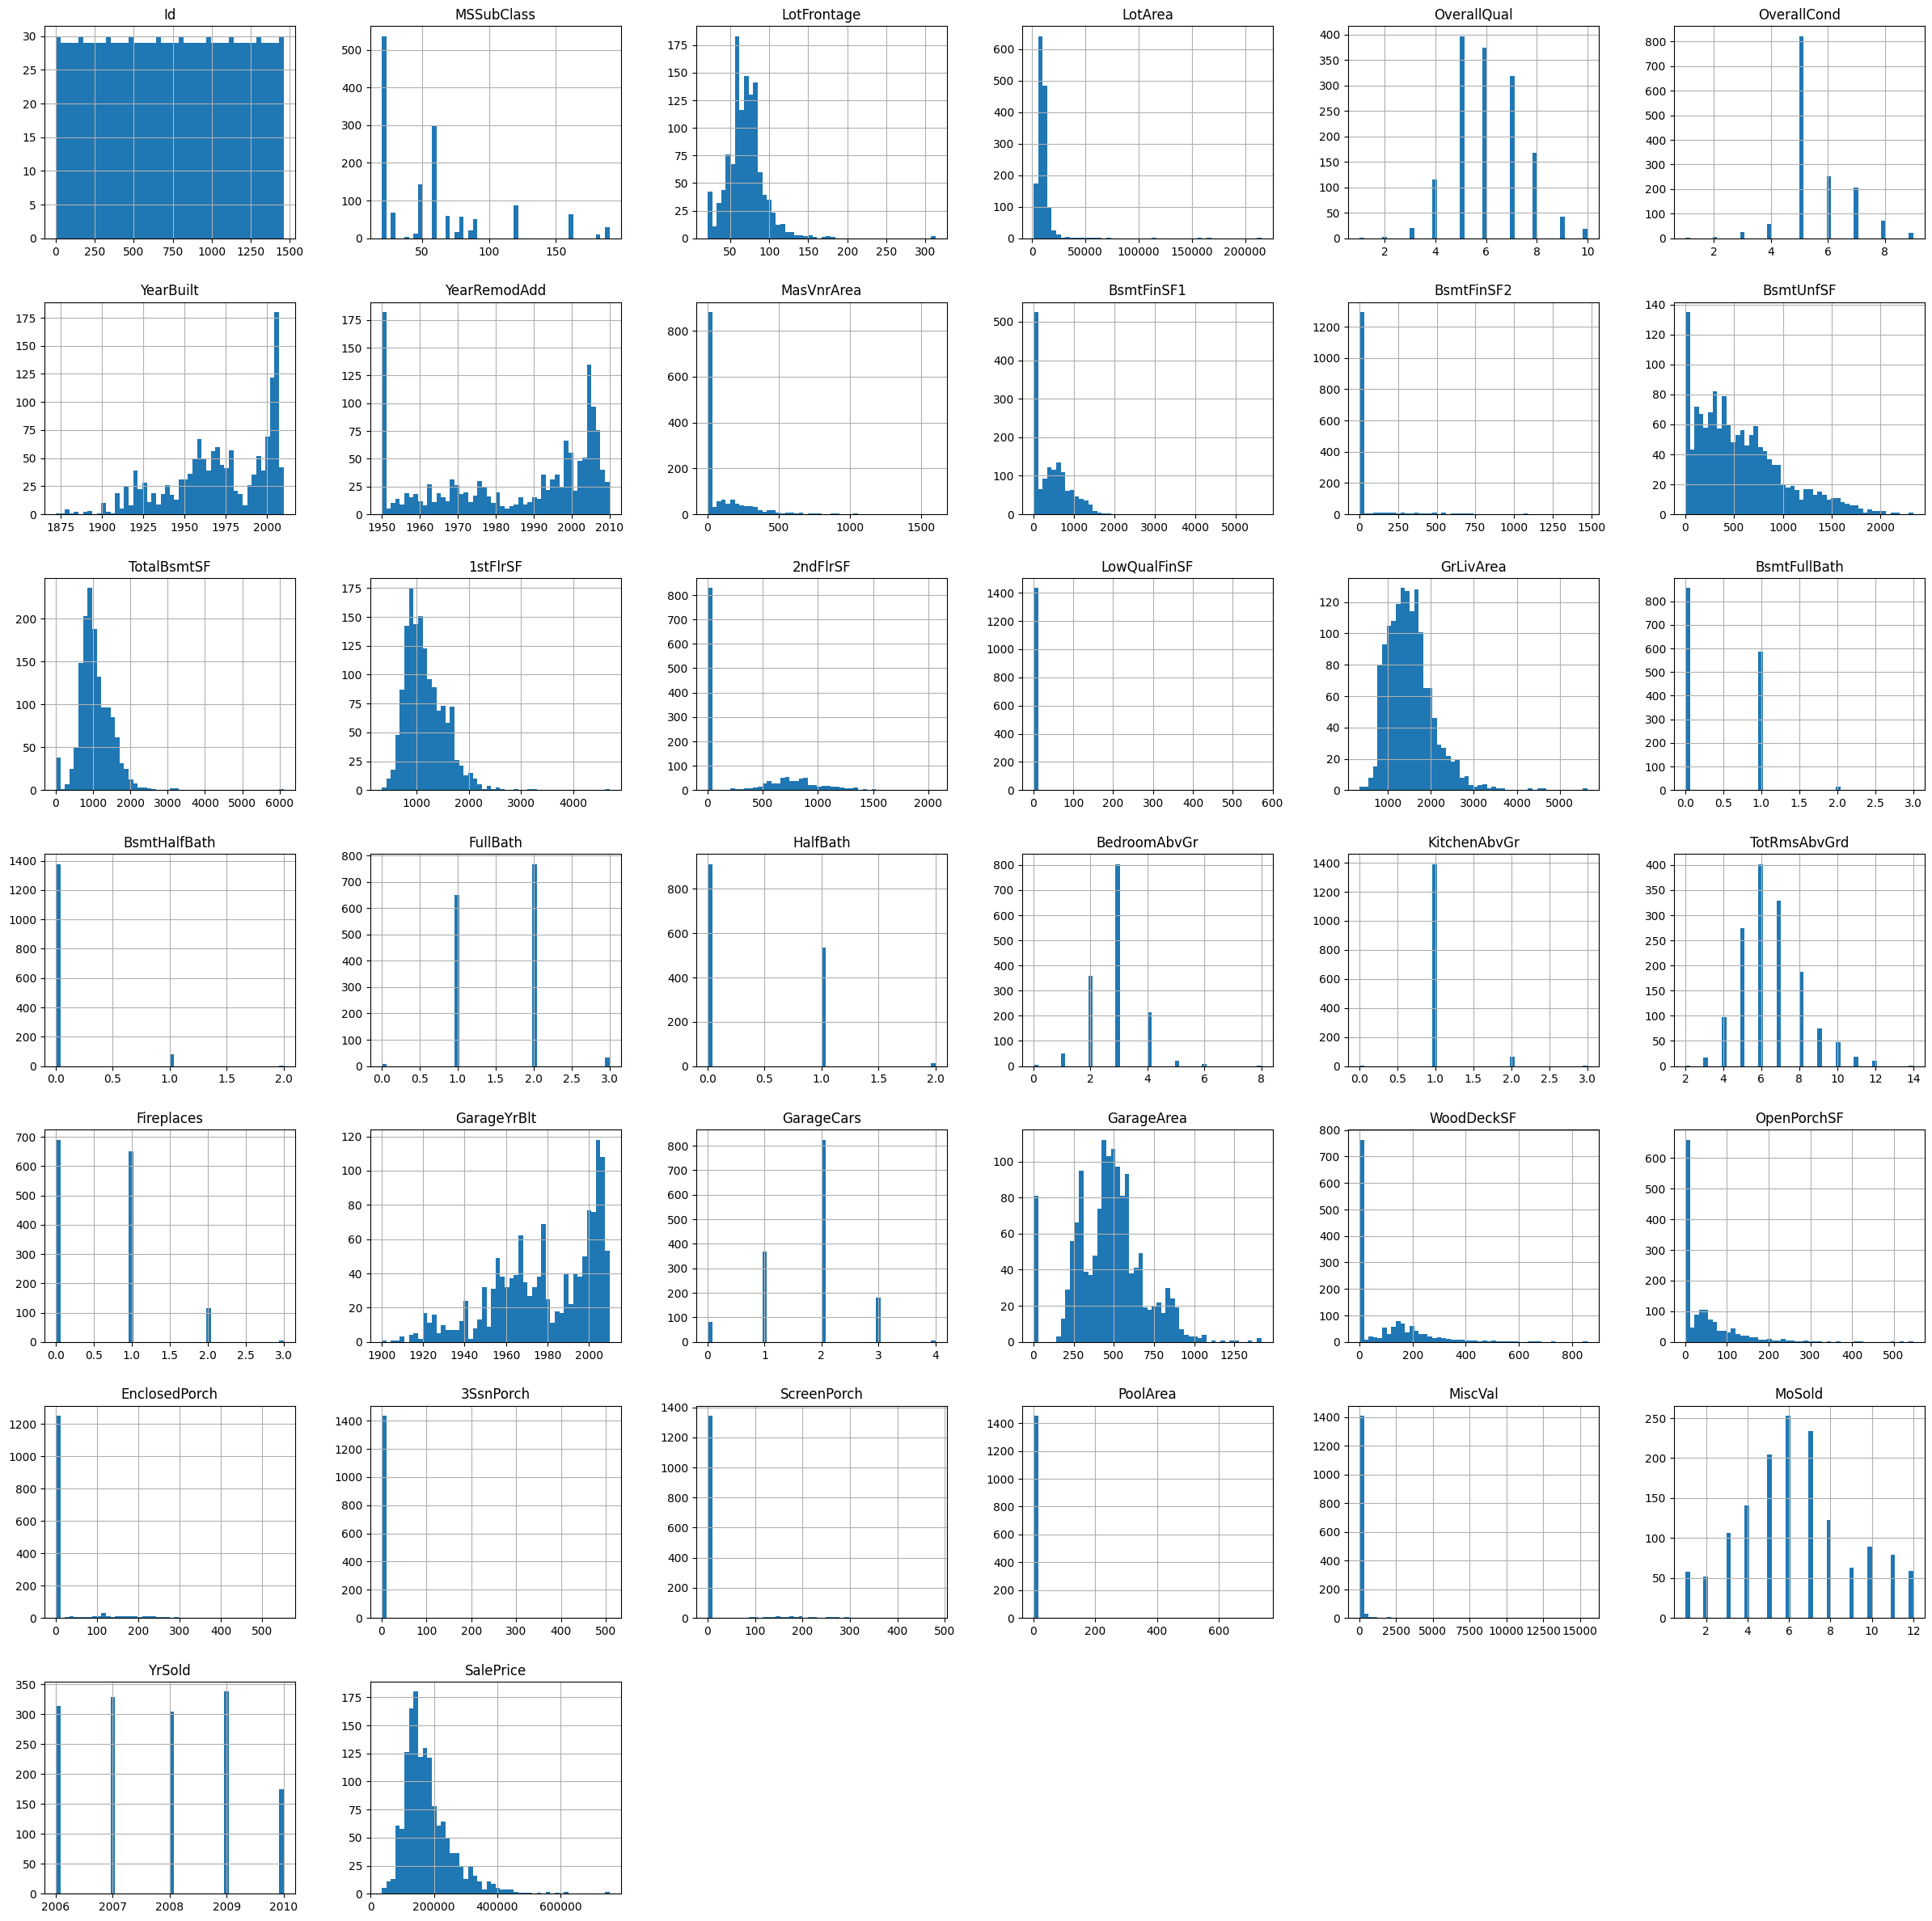

In [91]:
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(30,30))
plt.show()

### Correlation Analysis:

#### Identifying Non-Numeric Columns
Poniższy kod identyfikuje wszystkie cechy kategoryczne w naszym zbiorze danych. Rozpoznanie tych cech jest niezbędne, ponieważ nasze metody analizy korelacji będą się różnić dla danych numerycznych i nienumerycznych.
Standardowe współczynniki korelacji mają zastosowanie tylko do kolumn numerycznych, więc alternatywne podejścia mogą być konieczne dla tych zmiennych kategorialnych.

In [92]:
non_numeric_columns = train.select_dtypes(include=['object']).columns
print("Non numeric columns: ", non_numeric_columns)

Non numeric columns:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### Creating a Numeric-Only DataFrame
W tej części tworzymy nowy zbiór danych `train_numeric`, usuwając wszystkie kolumny nienumeryczne (kategoryczne) z naszego oryginalnego zbioru danych.
To uproszczenie pozwala nam skupić się na analizie numerycznej, takiej jak korelacja, która wymaga numerycznych typów danych.

In [93]:
train_numeric = train.drop(columns=non_numeric_columns)

### Preview of Numeric Data
Po wyizolowaniu kolumn numerycznych wyświetlamy kilka pierwszych wierszy tego dopracowanego zestawu danych. Ten krok zapewnia, że kolumny nieliczbowe zostały pomyślnie wykluczone i daje nam szybki wgląd w dane liczbowe, które będziemy analizować.


In [94]:
print(train_numeric.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0

### Calculating the Correlation Matrix
Tutaj obliczamy macierz korelacji dla wszystkich cech numerycznych. Ta macierz pomaga nam zrozumieć liniowe zależności między cechami a zmienną docelową "SalePrice". Jest to kluczowy krok w określeniu, które cechy mogą być najważniejsze dla przewidywania cen domów.


In [95]:
corr_matrix = train_numeric.corr()

### Analyzing Correlation with SalePrice
Sortujemy cechy na podstawie ich korelacji z "SalePrice". Pomaga to w szybkim określeniu, które cechy mają najsilniejszy pozytywny lub negatywny związek z cenami sprzedaży domów. Takie spostrzeżenia są niezbędne do wyboru cech i zrozumienia dynamiki rynku mieszkaniowego.


In [96]:
print(corr_matrix["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### Visualizations:

#### Scatter Plot of GrLivArea vs SalePrice
Poniższy wykres wizualizuje związek między powierzchnią mieszkalną ("GrLivArea") a cenami sprzedaży domów ("SalePrice"). Pomaga on zrozumieć, w jaki sposób wielkość powierzchni mieszkalnej wpływa na cenę, a także dostrzec wszelkie wartości odstające lub nietypowe trendy w danych.


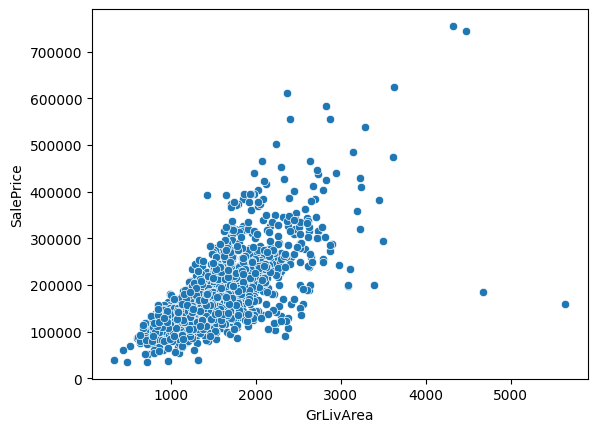

In [97]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.show()

### Boxplot of SalePrice Across Different OverallQual
Poniższy wykres ilustruje, jak "SalePrice" zmienia się w zależności od "OverallQual". Każde pole reprezentuje rozrzut i tendencję centralną (medianę) cen domów na każdym poziomie jakości. Wizualizacja ta ma kluczowe znaczenie dla zrozumienia wpływu jakości domu na cenę oraz dla identyfikacji wszelkich potencjalnych wartości odstających lub anomalii w zbiorze danych.


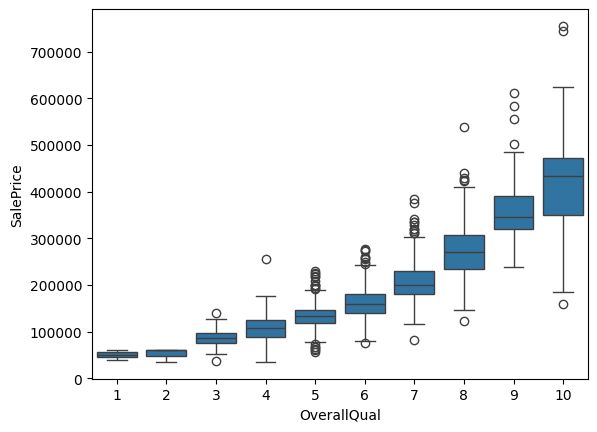

In [98]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.show()

## Data Preprocessing

### Handling Missing Data in 'LotFrontage'
Zajmujemy się brakującymi wartościami w kolumnie "LotFrontage", wypełniając je średnią kolumny. Podejście to jest odpowiednie dla kolumn numerycznych, w których brakujące dane nie są rozległe, a rozkład jest względnie zrównoważony. Jest to kluczowy etap wstępnego przetwarzania w celu przygotowania zestawu danych do dalszej analizy i modelowania, zapewniający, że nasze modele otrzymują kompletne dane bez wartości NaN.


In [99]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

### Feature Engineering: Creating 'TotalSF'
Ulepszamy nasz zbiór danych, opracowując nową funkcję "TotalSF", reprezentującą całkowitą powierzchnię domu. Jest ona obliczana jako suma powierzchni piwnicy, pierwszego piętra i drugiego piętra. Taka skonsolidowana cecha może często zapewnić bardziej znaczącą i całościową miarę wielkości domu, potencjalnie będąc silniejszym predyktorem jego ceny sprzedaży.


In [100]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

### Encoding Categorical Variables
Zamieniamy teraz zmienne kategoryczne na zmienne fikcyjne za pomocą kodowania one-hot. Ta transformacja ma kluczowe znaczenie dla przygotowania naszego zbioru danych dla algorytmów uczenia maszynowego, które zazwyczaj wymagają danych liczbowych. Proces ten tworzy nowe kolumny, z których każda reprezentuje unikalną kategorię w ramach oryginalnych zmiennych kategorycznych.

In [114]:
train = pd.get_dummies(train)

## Model Building

### Splitting Data into Training and Validation Sets
Zbiór danych jest podzielony na zestaw treningowy i zestaw walidacyjny. Zestaw treningowy służy do trenowania naszego modelu uczenia maszynowego, podczas gdy zestaw walidacyjny pozwala nam ocenić wydajność modelu na niewidocznych danych. Podział ten ma kluczowe znaczenie dla testowania uogólnialności i skuteczności naszego modelu.

In [102]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Select and Train Models:

In [103]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')

X_train_imputed = pd.DataFrame(num_imputer.fit_transform(X_train), columns=X_train.columns)

In [104]:
print(X_train_imputed.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 289, dtype: int64


### Imputing Missing Values in Training Data
Aby upewnić się, że nasz model trenuje na kompletnym zestawie danych, używamy `SimpleImputer` ze średnią strategią, aby uzupełnić wszelkie brakujące wartości w danych treningowych. Ten proces imputacji ma kluczowe znaczenie dla obsługi brakujących danych, ponieważ większość modeli uczenia maszynowego wymaga kompletnych zestawów danych do prawidłowego działania. Po imputacji sprawdzamy, czy w naszym zestawie treningowym nie pozostały żadne wartości zerowe.


In [105]:
print(X_train_imputed.isnull().sum().sum())

0


### Training the Model: Random Forest Regressor
Wybraliśmy regresor Random Forest dla naszego modelu ze względu na jego wszechstronność i odporność na nadmierne dopasowanie. Model jest trenowany na imputowanym zestawie danych treningowych, co pozwala mu uczyć się wzorców i relacji między naszymi cechami a zmienną docelową "SalePrice". Random Forest jest szczególnie skuteczny w zadaniach regresji i zapewnia cenny wgląd w znaczenie cech.


In [106]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_imputed, y_train)

RandomForestRegressor()

## Model Evaluation and Tuning

### Model Evaluation: Cross-Validation
Stosujemy walidację krzyżową do oceny wydajności naszego modelu Random Forest. Walidacja krzyżowa zapewnia bardziej wiarygodne oszacowanie wydajności modelu dzięki zastosowaniu wielu podziałów trening-test. Pomaga nam to zrozumieć, jak dobrze model może działać na niewidocznych danych. Używamy RMSE (Root Mean Square Error) jako naszego miernika do ilościowego określenia średniej różnicy między przewidywanymi a rzeczywistymi cenami sprzedaży.


In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_imputed, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores.mean())

28579.871540753782


### Hyperparameter Tuning Using GridSearchCV
Aby zoptymalizować nasz model Random Forest, wykonujemy strojenie hiperparametrów za pomocą GridSearchCV. Metoda ta systematycznie przechodzi przez wiele kombinacji wartości parametrów, dokonując walidacji krzyżowej w celu określenia, które parametry zapewniają najlepszą wydajność modelu. Najlepsze parametry są identyfikowane jako posiadające 30 drzew i uwzględniające do 8 cech w każdym podziale, optymalizując moc predykcyjną naszego modelu.


In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_imputed, y_train)
print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 30}


## Making Predictions

### Encoding and Aligning Test Data
Stosujemy kodowanie one-hot do danych testowych i dopasowujemy ich cechy do cech naszego zestawu treningowego. Ten krok ma kluczowe znaczenie dla zapewnienia, że nasz model, wyszkolony na zestawie danych treningowych, poprawnie interpretuje cechy danych testowych.

In [109]:
test = pd.get_dummies(test)
test_aligned = test.reindex(columns=X_train_imputed.columns, fill_value=0)

### Imputing Missing Values in Test Data
Do danych testowych stosujemy tę samą strategię imputacji, która została zastosowana do danych treningowych. Zapewnia to, że nasze dane testowe są kompletne i utrzymuje spójność w sposobie obsługi brakujących wartości w naszym zbiorze danych, przygotowując go do dokładnych i wiarygodnych prognoz.


In [110]:
test_imputed = pd.DataFrame(num_imputer.transform(test_aligned), columns=test_aligned.columns)
print(test_imputed.isnull().sum().sum())

0


#### Final Model:

### Selecting the Final Model
Wybieramy najlepszy model jako nasz model końcowy. Model ten został zoptymalizowany poprzez dostrojenie hiperparametrów i jest gotowy do prognozowania nowych danych, obiecując lepszą dokładność i niezawodność w porównaniu z modelem początkowym.


In [116]:
final_model = grid_search.best_estimator_

### Making Predictions on Test Data
Korzystając z naszego ostatecznego, zoptymalizowanego modelu, dokonujemy prognoz na przetworzonym zestawie danych testowych. Prognozy te przedstawiają szacunki naszego modelu dotyczące cen sprzedaży domów w zestawie testowym, pokazując praktyczne zastosowanie naszego potoku uczenia maszynowego.

In [117]:
final_predictions = final_model.predict(test_imputed)

#### Submission:

### Preparing the Submission File
Tworzymy DataFrame do przesłania, łącząc każdy identyfikator danych testowych z odpowiadającą mu przewidywaną ceną sprzedaży. Ten DataFrame jest zgodny z wymaganym formatem zgłoszenia do konkursu Kaggle, zapewniając, że nasze prognozy są poprawnie sformatowane i gotowe do oceny.


In [ ]:
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': final_predictions})

### Saving the Submission File

In [113]:
submission.to_csv('submission.csv', index=False)